In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, LeaveOneOut,RepeatedKFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

## Загрузка датасета

In [46]:
df = load_iris()
data = pd.DataFrame(df['data'], columns=df['feature_names'])

In [47]:
data['target'] = df['target']

In [48]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='target', ylabel='count'>

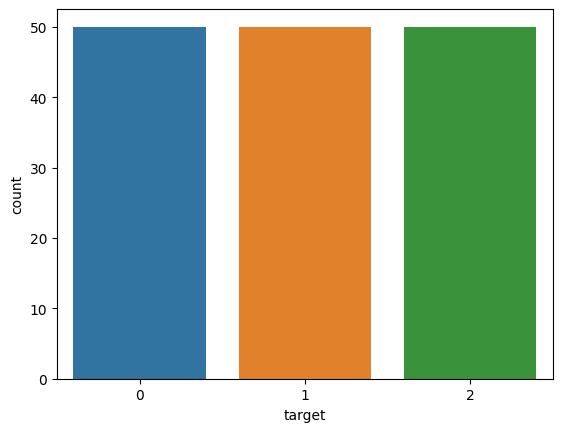

In [49]:
sns.countplot(data, x='target')

## Подготовка данных

In [50]:
X = data.drop(columns='target')
y = data['target']

## KFold

In [51]:
kfold = KFold(n_splits=10, shuffle=True)

In [52]:
folds = kfold.split(X, y)

Fold 0:


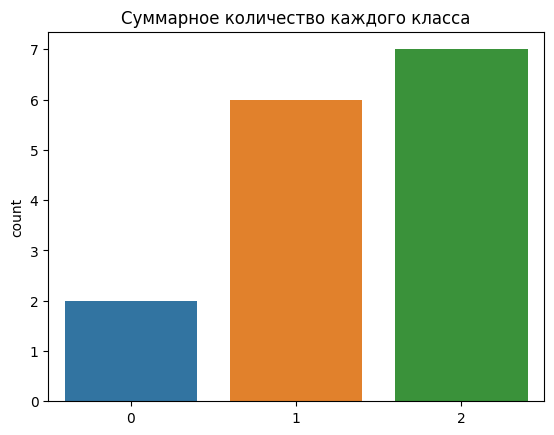

Fold 2:


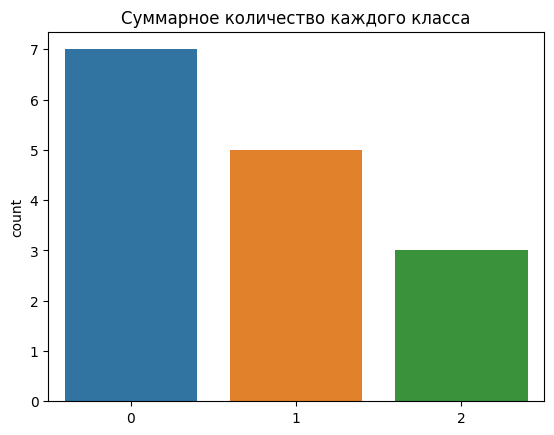

Fold 4:


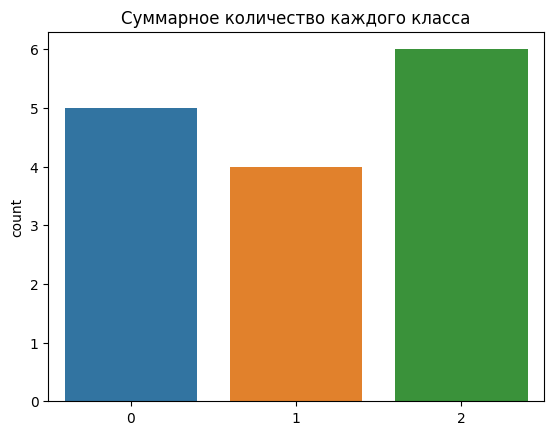

Fold 6:


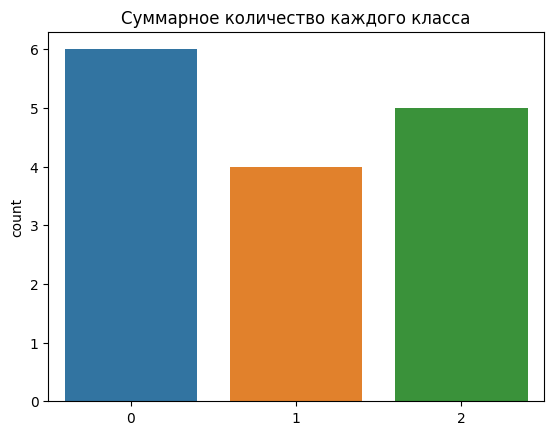

Fold 8:


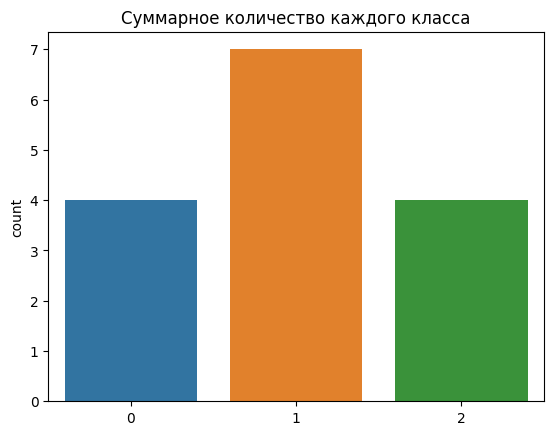

In [53]:
for i, (train_index, test_index) in enumerate(folds):
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
    if i % 2 == 0:
        print(f"Fold {i}:")
        sns.countplot(x=y[test_index].values)
        plt.title('Суммарное количество каждого класса')
        plt.show()

## StratifiedKFold

In [54]:
strat_kfold = StratifiedKFold(n_splits=10)
y_index = 0

Fold 0:


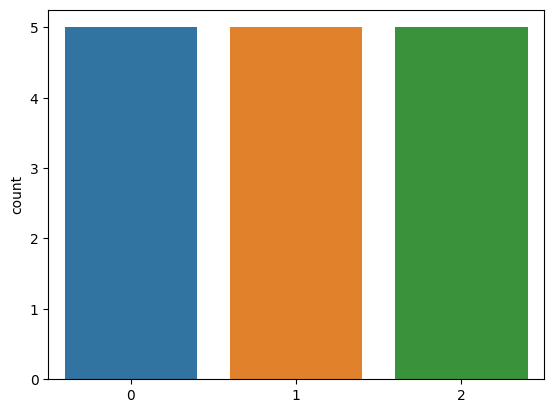

Fold 2:


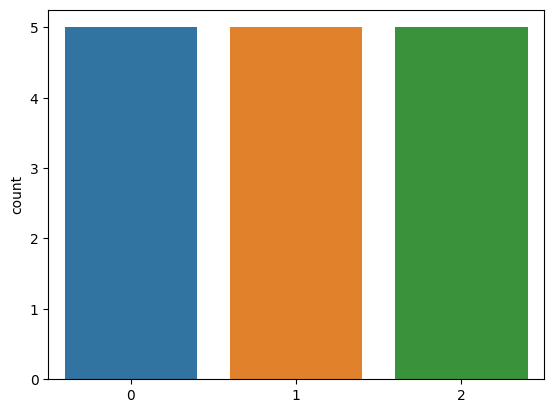

Fold 4:


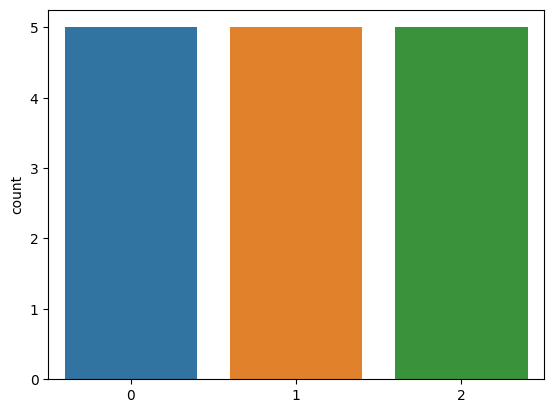

Fold 6:


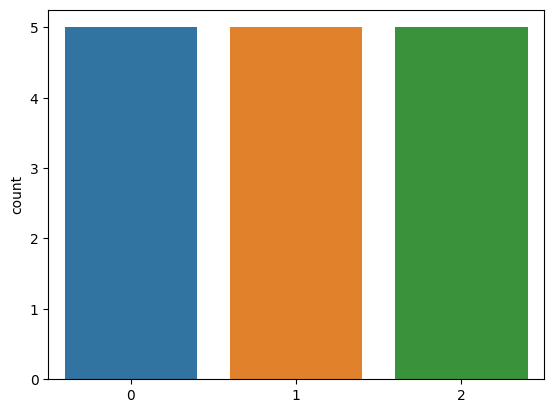

Fold 8:


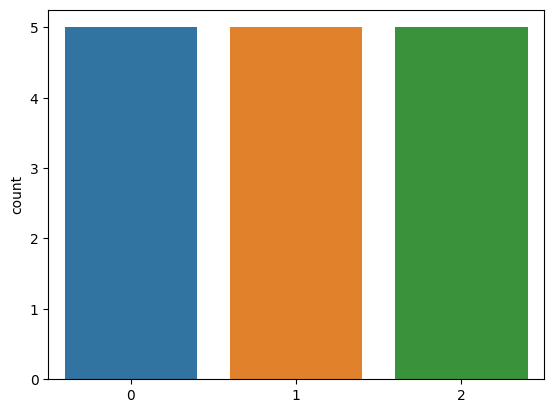

In [55]:
for i, (train_index, test_index) in enumerate(strat_kfold.split(X,y)):
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
    if i % 2 == 0:
        print(f"Fold {i}:")
        sns.countplot(x=y[test_index].values)
        plt.show()

## RepeatedKFold

In [56]:
rep_kfold = RepeatedKFold(n_splits=5, n_repeats=2)

In [57]:
for i, (train_index, test_index) in enumerate(rep_kfold.split(X,y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   7   9  10  11  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  29  30  31  33  35  37  38  39  40  42  43  44
  45  48  50  51  52  53  54  55  56  57  58  60  61  63  64  65  66  67
  68  69  70  72  73  74  76  77  78  79  82  83  85  86  89  90  92  93
  94  95  96  99 100 101 103 104 105 106 107 109 110 111 112 113 114 115
 116 117 118 119 120 122 123 124 125 126 127 128 129 130 131 133 134 135
 136 137 138 139 141 142 143 144 146 147 148 149]
  Test:  index=[  5   6   8  22  28  32  34  36  41  46  47  49  59  62  71  75  80  81
  84  87  88  91  97  98 102 108 121 132 140 145]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  18  19
  20  22  23  24  25  26  27  28  29  31  32  33  34  36  37  38  39  41
  42  43  44  46  47  49  50  51  53  54  55  56  58  59  61  62  63  65
  66  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  90  91  94  95  96  97  98

## LeaveOneOut

In [58]:
loo = LeaveOneOut()

In [59]:
for i, (train_index, test_index) in enumerate(loo.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
  Test:  index=[0]
Fold 1:
  Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81 

## Cross val score

In [60]:
model = DecisionTreeClassifier()

In [61]:
cross_val_score(model, X, y, cv=kfold, scoring='roc_auc_ovr').mean()

0.9679497354497355

In [62]:
cross_val_score(model, X, y, cv=strat_kfold, scoring='roc_auc_ovr').mean()

0.9650000000000001

In [63]:
cross_val_score(model, X, y, cv=rep_kfold, scoring='roc_auc_ovr').mean()

0.9574279765069239